In [1]:
import torch
torch.cuda.is_available()

False

In [3]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')
print('Device: {}'.format(my_device))

x = torch.tensor([2.0], requires_grad=True)
print(x)

Device: cpu
tensor([2.], requires_grad=True)


In [4]:
y = x ** 2 + 2 * x + 1
print(y)

tensor([9.], grad_fn=<AddBackward0>)


In [5]:
y.backward()

In [6]:
x.grad

tensor([6.])

In [7]:
import torch

# Create a tensor with requires_grad=True
x = torch.tensor([1., 2., 3.], requires_grad=True)

# Compute a function of x
y = x.sum()

# Compute gradients of y with respect to x
y.backward()

# Print gradients of x
print(x.grad)


tensor([1., 1., 1.])


In [11]:
import torch
import numpy as np
import math

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def sigmoid_by_formula(x):
    x = np.array(x)
    exp_x = np.exp(-x)
    sigmoid_values = 1 / (1 + exp_x)
    return sigmoid_values

x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([-1.0], requires_grad=True)

sigmoid_x1 = sigmoid(x1)
sigmoid_x2 = sigmoid(x2)

sigmoid_x1.backward()
sigmoid_x2.backward()

print("Sigmoid value at x1:", sigmoid_x1.item())
print("Gradient of sigmoid at x1:", x1.grad.item())
print("Sigmoid value at x2:", sigmoid_x2.item())
print("Gradient of sigmoid at x2:", x2.grad.item())

sigmoid_grad_x1_formula = sigmoid_by_formula(x1.detach().numpy()) * (1 - sigmoid_by_formula(x1.detach().numpy()))
sigmoid_grad_x2_formula = sigmoid_by_formula(x2.detach().numpy()) * (1 - sigmoid_by_formula(x2.detach().numpy()))

print("Gradient of sigmoid at x1 by formula:", sigmoid_grad_x1_formula)
print("Gradient of sigmoid at x2 by formula:", sigmoid_grad_x2_formula)


Sigmoid value at x1: 0.8807970285415649
Gradient of sigmoid at x1: 0.10499356687068939
Sigmoid value at x2: 0.2689414322376251
Gradient of sigmoid at x2: 0.1966119408607483
Gradient of sigmoid at x1 by formula: [0.10499363]
Gradient of sigmoid at x2 by formula: [0.19661193]


In [13]:
#Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.
x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([-1.0], requires_grad=True)

linear_x1 = x1
linear_x2 = x2

linear_x1.backward()
linear_x2.backward()

print("Gradient of linear activation at x1:", x1.grad.item())
print("Gradient of linear activation at x2:", x2.grad.item())

print("Known explicit formula for gradient: 1")


Gradient of linear activation at x1: 1.0
Gradient of linear activation at x2: 1.0
Known explicit formula for gradient: 1


In [14]:
#Compute the gradient for the relu activation function in 2 points using pytorch and check it with the known explicit formula.
def relu_activation(x):
    return torch.max(torch.tensor(0.0), x)

x1 = torch.tensor([2.0], requires_grad=True)
x2 = torch.tensor([-1.0], requires_grad=True)

relu_x1 = relu_activation(x1)
relu_x2 = relu_activation(x2)

relu_x1.backward()
relu_x2.backward()

print("Gradient of ReLU activation at x1:", x1.grad.item())
print("Gradient of ReLU activation at x2:", x2.grad.item())

known_explicit_gradient_x1 = 1 if x1.item() > 0 else 0
known_explicit_gradient_x2 = 1 if x2.item() > 0 else 0

print("Known explicit formula for gradient at x1:", known_explicit_gradient_x1)
print("Known explicit formula for gradient at x2:", known_explicit_gradient_x2)


Gradient of ReLU activation at x1: 1.0
Gradient of ReLU activation at x2: 0.0
Known explicit formula for gradient at x1: 1
Known explicit formula for gradient at x2: 0


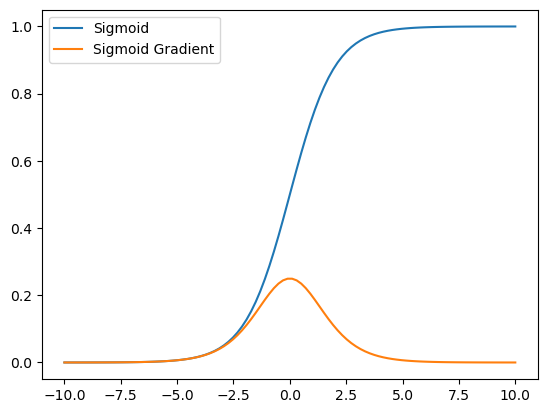

In [18]:
#Write in python a function to plot the sigmoid activation function and its gradient using matplotlib
import numpy as np
import matplotlib.pyplot as plt

sigmoid = lambda x: 1 / (1 + np.exp(-x))
sigmoid_gradient = lambda x: sigmoid(x) * (1 - sigmoid(x))

x_values = np.linspace(-10, 10, 100)

plt.plot(x_values, sigmoid(x_values), label='Sigmoid')
plt.plot(x_values, sigmoid_gradient(x_values), label='Sigmoid Gradient')
plt.legend()
plt.show()


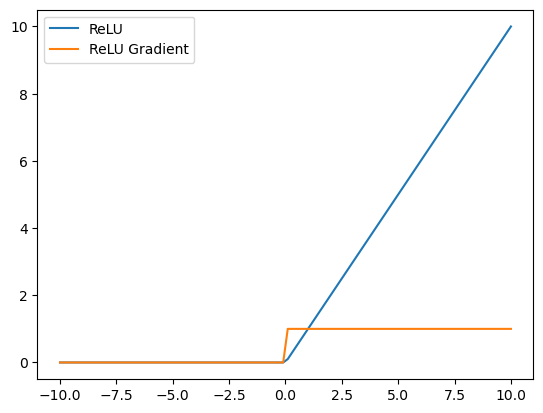

In [19]:
#Write in python a function to plot the ReLU activation function and its gradient using matplotlib.
import numpy as np
import matplotlib.pyplot as plt

relu = lambda x: np.maximum(0, x)
relu_gradient = lambda x: np.where(x > 0, 1, 0)

x_values = np.linspace(-10, 10, 100)

plt.plot(x_values, relu(x_values), label='ReLU')
plt.plot(x_values, relu_gradient(x_values), label='ReLU Gradient')
plt.legend()
plt.show()


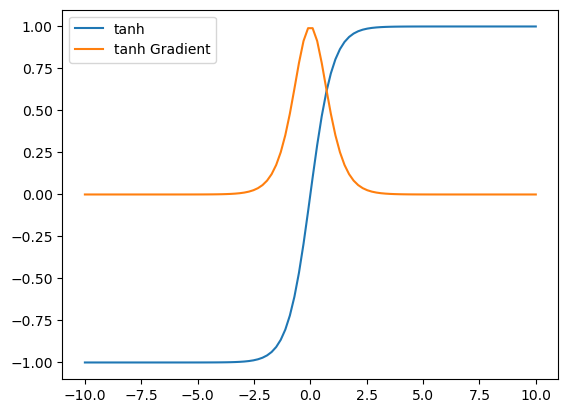

In [20]:
#Write in python a function to plot the tanh activation function and its gradient using matplotlib.
import numpy as np
import matplotlib.pyplot as plt

tanh = lambda x: np.tanh(x)
tanh_gradient = lambda x: 1 - np.tanh(x) ** 2

x_values = np.linspace(-10, 10, 100)

plt.plot(x_values, tanh(x_values), label='tanh')
plt.plot(x_values, tanh_gradient(x_values), label='tanh Gradient')
plt.legend()
plt.show()


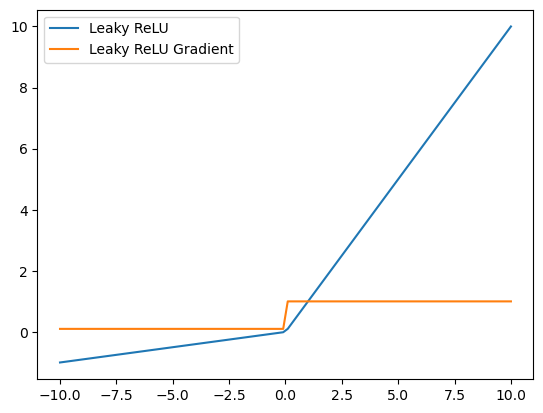

In [21]:
#Write in python a function to plot the leaky ReLU activation function and its gradient using matplotlib.
import numpy as np
import matplotlib.pyplot as plt

leaky_relu = lambda x, alpha: np.maximum(alpha * x, x)
leaky_relu_gradient = lambda x, alpha: np.where(x > 0, 1, alpha)

x_values = np.linspace(-10, 10, 100)
alpha = 0.1

plt.plot(x_values, leaky_relu(x_values, alpha), label='Leaky ReLU')
plt.plot(x_values, leaky_relu_gradient(x_values, alpha), label='Leaky ReLU Gradient')
plt.legend()
plt.show()


In [22]:
import torch
import torch.nn as nn

input_size = 2
output_size = 1

class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x


In [23]:
perceptron = Perceptron(input_size, output_size)
x = torch.tensor([0.5, 0.2])
y = perceptron(x)
print(y)

tensor([0.4637], grad_fn=<SigmoidBackward0>)


In [24]:

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(perceptron.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

# Generate some random input data and labels
input_data = torch.randn((10, input_size))
labels = torch.randint(0, 2, (10, output_size)).float()

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.5049
Epoch [200/1000], Loss: 0.4938
Epoch [300/1000], Loss: 0.4919
Epoch [400/1000], Loss: 0.4915
Epoch [500/1000], Loss: 0.4914
Epoch [600/1000], Loss: 0.4914
Epoch [700/1000], Loss: 0.4914
Epoch [800/1000], Loss: 0.4914
Epoch [900/1000], Loss: 0.4914
Epoch [1000/1000], Loss: 0.4914


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim

class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        return x

input_size = 2

input_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
labels = torch.tensor([[0], [1], [1], [1]], dtype=torch.float32)

perceptron = Perceptron(input_size)

criterion = nn.BCELoss()

optimizer = optim.SGD(perceptron.parameters(), lr=0.1)

num_epochs = 1000
for epoch in range(num_epochs):
    outputs = perceptron(input_data)
    loss = criterion(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

with torch.no_grad():
    predicted_labels = perceptron(input_data)
    predicted_labels = torch.round(predicted_labels)
    accuracy = (predicted_labels == labels).sum().item() / labels.size(0)

print("Accuracy:", accuracy)


Epoch [100/1000], Loss: 0.3100
Epoch [200/1000], Loss: 0.2460
Epoch [300/1000], Loss: 0.2029
Epoch [400/1000], Loss: 0.1719
Epoch [500/1000], Loss: 0.1488
Epoch [600/1000], Loss: 0.1308
Epoch [700/1000], Loss: 0.1165
Epoch [800/1000], Loss: 0.1048
Epoch [900/1000], Loss: 0.0952
Epoch [1000/1000], Loss: 0.0871
Accuracy: 1.0
